## **Predict Future Sales**
Final project for "How to win a data science competition" Coursera course<br>
https://www.kaggle.com/c/competitive-data-science-predict-future-sales/overview

#### **Data Preparation**

In [ ]:
import pandas as pd 
import numpy as np
import glob 
import os 
import matplotlib.pyplot as plt

In [17]:
rawdata = {}
rawdata["item_cat"] = pd.read_csv(os.path.join("rawdata","item_categories.csv"),encoding="utf-8",index_col=1)
rawdata["items"] = pd.read_csv(os.path.join("rawdata","items.csv"),encoding="utf-8",index_col=1)
rawdata["sales_train"] = pd.read_csv(os.path.join("rawdata","sales_train.csv"),encoding="utf-8",parse_dates=[0],index_col=0)
rawdata["shops"] = pd.read_csv(os.path.join("rawdata","shops.csv"),encoding="utf-8")
rawdata["test"] = pd.read_csv(os.path.join("rawdata","test.csv"),encoding="utf-8")

In [18]:
for key in rawdata.keys():
    df = rawdata[key]
    print(df.head(3))
    print("[Nan Values]")
    print(df.isna().sum())
    print()

                       item_category_name
item_category_id                         
0                 PC - Гарнитуры/Наушники
1                        Аксессуары - PS2
2                        Аксессуары - PS3
[Nan Values]
item_category_name    0
dtype: int64

                                                 item_name  item_category_id
item_id                                                                     
0                ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D                40
1        !ABBYY FineReader 12 Professional Edition Full...                76
2            ***В ЛУЧАХ СЛАВЫ   (UNV)                    D                40
[Nan Values]
item_name           0
item_category_id    0
dtype: int64

            date_block_num  shop_id  item_id  item_price  item_cnt_day
date                                                                  
2013-02-01               0       59    22154       999.0           1.0
2013-03-01               0       25     2552       899.0           1.0

#### **異常値処理**

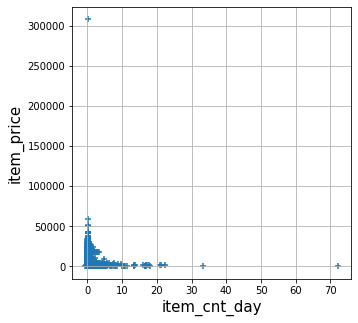

In [19]:
df = rawdata["sales_train"]

x = df["item_cnt_day"].values/30
y = df["item_price"].values

fig = plt.figure(figsize=(5,5))
plt.scatter(x=x,y=y,marker="+")
plt.ylabel("item_price",fontsize=15)
plt.xlabel("item_cnt_day",fontsize=15)
plt.grid(True)
plt.show()

item_cnt_dayに関しては, データの説明部分で「1か月の売り上げは[0,2]の範囲だ」とあったので, だいたい30日くらいの平均で見てみて, 30個超えてたら外れ値かな...<br>
item_priceに関しては, さすがに300000万はないでしょ... 100000万いじょうを異常とする.

In [20]:
df = rawdata["sales_train"]
x = df["item_cnt_day"].values/30
y = df["item_price"].values

rawdata["sales_train"].loc[x>30,"item_cnt_day"] = np.nan
rawdata["sales_train"].loc[y>100000,"item_cnt_day"] = np.nan

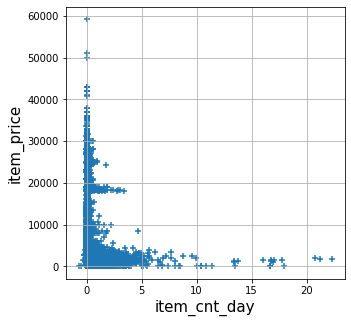

In [22]:
df = rawdata["sales_train"]

x = df["item_cnt_day"].values/30
y = df["item_price"].values

fig = plt.figure(figsize=(5,5))
plt.scatter(x=x,y=y,marker="+")
plt.ylabel("item_price",fontsize=15)
plt.xlabel("item_cnt_day",fontsize=15)
plt.grid(True)
plt.show()

ん? item_priceが0以下のやつがいるな? こいつも消してしまおう

In [23]:
df = rawdata["sales_train"]
x = df["item_cnt_day"].values/30
y = df["item_price"].values

rawdata["sales_train"].loc[x<=0,"item_cnt_day"] = np.nan

C:\Users\organ\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less_equal
  """


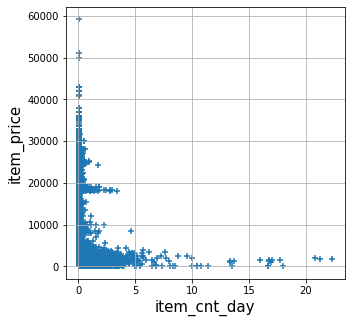

In [24]:
df = rawdata["sales_train"]

x = df["item_cnt_day"].values/30
y = df["item_price"].values

fig = plt.figure(figsize=(5,5))
plt.scatter(x=x,y=y,marker="+")
plt.ylabel("item_price",fontsize=15)
plt.xlabel("item_cnt_day",fontsize=15)
plt.grid(True)
plt.show()

いい感じじゃないですかね. ということで, 出力.

In [26]:
rawdata["sales_train"].to_csv(os.path.join("data","sales_train.csv"),encoding="shift-jis")